# CS 207 Final Project

## Automatic Differentiation

#### Group 20: Lindsey Brown, Xinyue Wang, Kevin Yoon

#### December 12, 2018


# Table of Contents

* Background
* Overview
* How to Use
* How to Install + Testing
* Examples
* Computational Graph, Table, Plot
* Graphic User Interface (GUI)
* Future Work and Extensions

In [1]:
%cd ..
%cd AD20
'''
Step 0:
- import necessary libraries
'''
import AD20
import numpy as np
from AD20.ADnum import ADnum
import AD20.ADmath as ADmath
import AD20.ADgraph as ADgraph

/Users/jiwhanyoon/Desktop/cs207/cs207-FinalProject
/Users/jiwhanyoon/Desktop/cs207/cs207-FinalProject/AD20


# Getting Started

## Goal
- Build a software library that can execute Automatic Differentiation

## Background
- Automatic Differentiation - computes the derivative of a function, unique for its ability to handle complex combinations of functions without sacrificing the accuracy
- A function can be decomposed into a sequence of elementary arithmetic operations (addition, subtraction, multiplication, division, etc.) and elementary functions (exp, log, sin, cos, etc.).
- Applications in machine learning, parameter optimization, sensitivity analysis, physical modeling, etc


## Application: Newton's Method

One basic application of differentiation is Newton's method for finding roots of a function. For demonstration of using our package for such an application, we will consider the function

$$f(x) = x^2 + \sin(x)$$

which we know has a root at $x=0$.  The plot below also shows that the function has an additional root near -1.

Text(0.5, 1.0, 'Plot of f(x) Showing Two Roots')

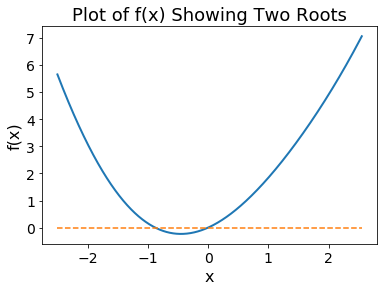

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-2.5, 2.55, 1000)
f = x**2+np.sin(x)

plt.plot(x, f, linewidth = 2)
plt.plot(x, np.zeros((1000,)), '--')
plt.xlabel('x', fontsize = 16)
plt.ylabel('f(x)', fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize =14)
plt.title('Plot of f(x) Showing Two Roots', fontsize = 18)

In [3]:
#implementation of Newton's method using AD20, without hardcoding the derivative

#function that we wish to find the roots of
def f(x):
    return x**2+ADmath.sin(x)

#Newton's method
x = ADnum(1, der = 1) #set an initial guess for the root

for i in range(1000):
    dx = -f(x).val/f(x).der #get change using ADnum attributes
    if np.abs(dx) < .000001: #check if within some tolerance
        print('Root found at: ' + str(x.val))
        break
    x = x+dx #update the guess
    

Root found at: 1.2094714295298077e-11


In [4]:
y = ADnum(-1, der = 1) #set an initial guess for the root

for i in range(1000):
    dy = -f(y).val/f(y).der #get change using ADnum attributes
    if np.abs(dy) < .000001: #check if within some tolerance
        print('Root found at: ' + str(y.val))
        break
    y = y+dy #update the guess

Root found at: -0.8767262984818225


### Example: The Computational Graph
Consider the example function $$f\left(x,y\right) = x^{3} + \sin(5y)$$
evaluated at $(x,y) = (1, \frac{\pi}{5})$.

The evaluation trace can be visualized with a computational graph.

![comp-graph](figs/compgraphppt.jpg)

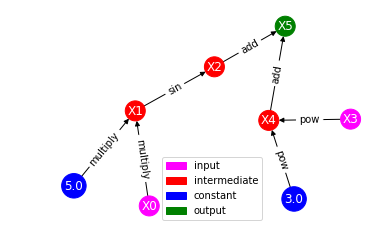

In [5]:
x = ADnum(1, ins = 2, ind = 0)
y = ADnum(np.pi/5 , ins = 2, ind = 1)

f = x**3 + ADmath.sin(5 * y)

graph = ADgraph.draw_graph(f)

The evaluation trace looks like:

![comp-table](figs/comptable.jpg)

In [6]:
ADgraph.gen_table(f)

,Trace,Operation,Value,Derivative
5,X0,input,0.6283185307179586,"[0.0, 1.0]"
4,X1,"multiply(X0 , 5.0)",3.141592653589793,"[0.0, 5.0]"
3,X2,sin(X1),1.2246467991473532e-16,"[-0.0, -5.0]"
2,X3,input,1.0,"[1.0, 0.0]"
1,X4,"pow(X3 , 3.0)",1.0,"[3.0, 0.0]"
0,X5,"add(X2 , X4)",1.0000000000000002,"[3.0, -5.0]"


## Overview

`ADnum` objects represent mathematical objects for which they would like to evaluate a value or a derivative. 

The elementary operations and functions defined for the `ADnum` class can be composed to create any desired function - users need to create an `ADnum` object for each input variable and use all the mathematical functions defined in the `ADmath` library to implement special functions. 

Furthermore, use `ADgraph` to create a computational graph, plot, and table for your function. The Graphic User Interface (GUI) provides a way to visualize the computational trace table and graph.


### ADnum
Creates `ADnum` objects, which are defined by the attributes of a value and a derivative, from numbers or tuples.  Define all of the numerical operations for `ADnum` objects, so that they correctly track all derivatives.

### ADmath
Implements the trigonometric functions, the inverse trigonometric functions, the hyperbolic trig functions, and the natural exponential and natural logarithm. All of the functions defined in the `ADmath` module define elementary functions of `ADnum` objects.

### ADgraph
Creates `ADgraph` objects, which can be used to show the computation process in either a computational graph or table.

# Installation Guide

    pip install AD20

Run any script in the proper directory (at the head AD20 directory)



## Steps

1. initialize the variable to a specific value it should be evaluated at and to the derivative it should have
2. define a function
3. Use the class attributes to access the value and deriviative of the function

## Example 1: Simple Elementary Functions

In [7]:

'''
Step 0:
- import necessary libraries
'''
import AD20
import numpy as np
from AD20.ADnum import ADnum
import AD20.ADmath as ADmath
import AD20.ADgraph as ADgraph

In [8]:
'''
Step 1: 
- initialize the variable to a specific value it should be evaluated at
- initialize the derivative of the variable
OR
- initialize number of inputs(ins) and order (ind) 
'''
x = ADnum(2, der = 1)

'''
Step 2:
- define a function f
'''
f = 2 * x**3

In [9]:
'''
Step 3:
- Use the class attributes to access the value and deriviative of the function

x = 2
f = 2 * x**3

'''
print(f.val) # value of f, evaluated at x (2 * 8 = 16)
print(f.der) # derivative of f, evaluated at x (6 * 4 = 24)
print(x.val) # value of x, the variable itself (2)
print(x.der) # derivative of x (1)

16.0
24.0
2.0
1.0


# Example 2: Using ADmath

In [10]:
x = ADnum(np.pi, der = 1) # Step 1: initialize x, this time at pi

f = ADmath.sin(x) # Step 2: create a function, using elementary functions from the ADmath module

print(f.val) # should print 1.22e-16 due to floating point error in numpy implementation (should be sin(pi) = 0)
print(f.der) # should print -1.0 (cos(pi) = -1)
print(x.val) # should print 3.14 (pi)
print(x.der) # should print 1 (1)

1.2246467991473532e-16
-1.0
3.141592653589793
1.0


# Example 3: Multiple Variables

In [11]:
# Step 1: intialize x and y to a specific value
x = ADnum(3, ins = 2, ind = 0) 
y = ADnum(4, ins = 2, ind = 1)

# Step 2: define a function f
f = 2 * y + 2 * x**2

# Steps 3 and 4: Use the class attributes to access the value and 
# deriviative of the function at the value of the input x 
print(f.val) # 2 * 4 + 2 * 9 = 26
print(f.der) # 4 * 3 = 12 AND 2 * 1 = 2
print(x.val) # 3
print(x.der) # 1 AND 0
print(y.val) # 4
print(y.der) # 0 AND 1

26.0
[12.  2.]
3.0
[1. 0.]
4.0
[0. 1.]


# Example 4: Vector-valued Functions

In [12]:
# Step 1: intialize x and y to a specific value
x = ADnum(2, ins = 2, ind = 0)
y = ADnum(3, ins = 2, ind = 1)

# Step 2: define a function F as a vector
F = [x**2, x+y, 4*y]

print(F[0].val) # 2^2 = 4
print(F[0].der) # 2 * 2 = 4 AND 0
print(F[1].val) # 2 + 3 = 5
print(F[1].der) # 1 AND 1
print(F[2].val) # 4 * 3 = 12
print(F[2].der) # 0 AND 4

4.0
[4. 0.]
5.0
[1. 1.]
12.0
[0. 4.]


# Example 5: Vector-valued Inputs

In [13]:
x = ADnum([3,4,5], ins = 1, ind = 0)

f = 2*x

print(f.val) 
print(f.der) 
print(x.val) 
print(x.der) 

[ 6.  8. 10.]
[2. 2. 2.]
[3. 4. 5.]
[1. 1. 1.]


# Computational Plot, Graph, and Table

In addition to the value and derivative, our `ADnum` objects also have a `graph` attribute, which stores a dictionary representing the edges of the computational graph.

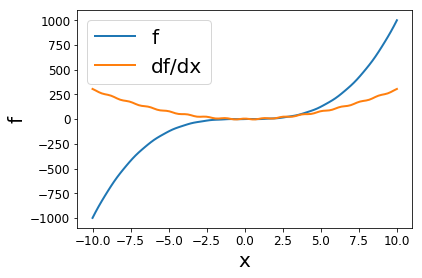

In [14]:
x = ADnum(5, der = 1)

def f(x):
    return x**3 + ADmath.sin(5 * x)

g = ADgraph.plot_ADnum(f)

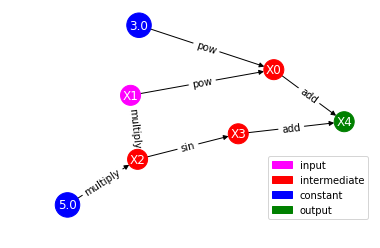

In [15]:
graph = ADgraph.draw_graph(f(x))

In [16]:
ADgraph.gen_table(f(x))

,Trace,Operation,Value,Derivative
4,X0,"pow(3.0 , X1)",125.0,75.0
3,X1,input,5.0,1.0
2,X2,"multiply(X1 , 5.0)",25.0,5.0
1,X3,sin(X2),-0.13235175009777303,4.956014059317368
0,X4,"add(X0 , X3)",124.86764824990223,79.95601405931737


# Graphic User Interface

A pedogogical tool to teach people about automatic differentiation procedures.

# Future Work

* Extend GUI to work with multiple inputs
* Develop a package using our library for other applications of AD


# Conclusion

We have successfully built a fully-functional forward-mode automatic differentiation library. Via `ADnum` and `ADmath` libraries, users can compute the derivatives of any complicated functions.

For our extension, we created an interactive graphic user interface (GUI) for users to input their own functions and variables to observe the intermediate steps, while providing the computational graph and traces. This provided an educational opportunity for users to learn about the steps under the hood.

# Questions?



# Thank You!